In [2]:
!nvidia-smi

Fri Aug 18 02:24:30 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.86.05              Driver Version: 535.86.05    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A6000               Off | 00000000:01:00.0 Off |                  Off |
| 30%   53C    P8              18W / 300W |   3160MiB / 49140MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# demographic, address, transactions

In [76]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [67]:
demographic = pd.read_csv("customer_demographic_cleaned.csv")
address = pd.read_csv("customer_address_cleaned.csv")
transactions = pd.read_csv("transactions_cleaned.csv")

In [5]:
oldCustomerList_1 = pd.merge(demographic, address, on =['customer_id'])
oldCustomerList = pd.merge(oldCustomerList_1, transactions, on = ['customer_id'])

In [6]:
oldCustomerList.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0


In [9]:
oldCustomerList.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'Age', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date'],
      dtype='object')

In [10]:
oldCustomerList.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age                                    0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line    

In [11]:
oldCustomerList = oldCustomerList.sort_values(by = ['customer_id'])

In [12]:
oldCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 12969
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          12970 non-null  int64  
 1   first_name                           12970 non-null  object 
 2   last_name                            12970 non-null  object 
 3   gender                               12970 non-null  object 
 4   past_3_years_bike_related_purchases  12970 non-null  int64  
 5   DOB                                  12970 non-null  object 
 6   job_title                            12970 non-null  object 
 7   job_industry_category                12970 non-null  object 
 8   wealth_segment                       12970 non-null  object 
 9   deceased_indicator                   12970 non-null  object 
 10  owns_car                             12970 non-null  object 
 11  tenure                           

In [13]:
oldCustomerList.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,Age,postcode,property_valuation,transaction_id,product_id,online_order,list_price,standard_cost,product_first_sold_date
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,1713.614418,49.300848,10.740478,45.439476,2989.444950,7.512259,9984.739399,45.538319,0.498998,1109.001648,556.944534,38227.030686
std,1013.712313,28.656931,5.667316,12.511711,859.772087,2.830778,5760.241495,30.511540,0.500018,585.330615,409.299679,2877.700133
min,1.000000,0.000000,1.000000,21.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,12.010000,7.210000,33259.000000
25%,817.000000,25.000000,6.000000,36.000000,2193.000000,6.000000,5023.500000,18.000000,0.000000,575.270000,215.140000,35667.000000
50%,1714.000000,48.000000,11.000000,45.000000,2765.000000,8.000000,9962.000000,44.000000,0.000000,1163.890000,486.150000,38216.000000
75%,2582.000000,73.000000,16.000000,55.000000,3752.000000,10.000000,14958.500000,72.000000,1.000000,1635.300000,795.100000,40779.000000
max,3497.000000,99.000000,22.000000,91.000000,4883.000000,12.000000,20000.000000,100.000000,1.000000,2091.470000,1759.850000,42710.000000


In [14]:
oldCustomerList.duplicated().sum()

0

In [18]:
oldCustomerList['Age'].describe()

count    12970.000000
mean        45.439476
std         12.511711
min         21.000000
25%         36.000000
50%         45.000000
75%         55.000000
max         91.000000
Name: Age, dtype: float64

In [20]:
oldCustomerList['DOB'] = oldCustomerList['DOB'].apply(pd.to_datetime)

In [21]:
oldCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 12969
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          12970 non-null  int64         
 1   first_name                           12970 non-null  object        
 2   last_name                            12970 non-null  object        
 3   gender                               12970 non-null  object        
 4   past_3_years_bike_related_purchases  12970 non-null  int64         
 5   DOB                                  12970 non-null  datetime64[ns]
 6   job_title                            12970 non-null  object        
 7   job_industry_category                12970 non-null  object        
 8   wealth_segment                       12970 non-null  object        
 9   deceased_indicator                   12970 non-null  object        
 10  owns_car       

In [22]:
# adding transaction month
oldCustomerList['transaction_month'] = pd.DatetimeIndex(oldCustomerList['DOB']).month

In [23]:
#adding a profit column 
oldCustomerList['profit'] = oldCustomerList['list_price'] - oldCustomerList['standard_cost']
oldCustomerList['profit'].describe()

count    12970.000000
mean       552.057115
std        494.729603
min          4.800000
25%        133.780000
50%        445.210000
75%        827.160000
max       1702.550000
Name: profit, dtype: float64

In [24]:
oldCustomerList.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_month,profit
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,10,90.10
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,10,17.87
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0,10,75.75
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0,10,509.97
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,10,751.02


In [25]:
len(oldCustomerList)

12970

In [26]:
oldCustomerList.tail()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_month,profit
12963,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,Approved,Trek Bicycles,Mountain,low,medium,574.64,459.71,37659.0,4,114.93
12966,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,Approved,Solex,Standard,medium,medium,1945.43,333.18,41922.0,4,1612.25
12968,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,38193.0,5,1055.82
12967,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,Approved,Solex,Standard,medium,medium,575.27,431.45,35160.0,5,143.82
12969,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,42688.0,5,448.68


## Data Visualization

In [27]:
#discrete columns
dis_col = oldCustomerList.select_dtypes(include = ['object']).columns

#continuous columns
con_col = oldCustomerList.select_dtypes(include = ['int64', 'float64']).columns

In [28]:
print(len(dis_col))
print(len(con_col))

17
13


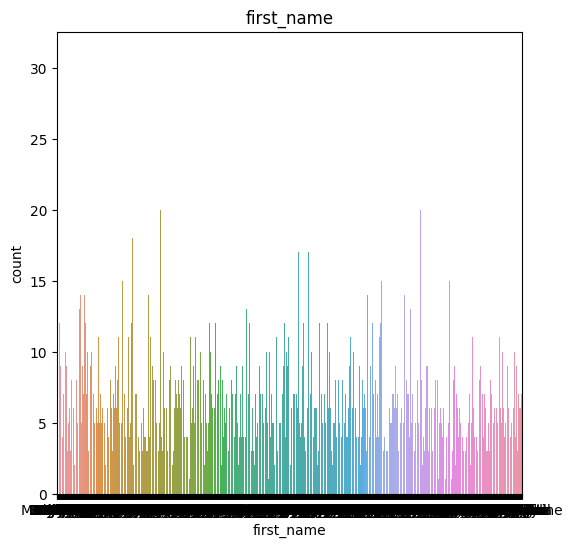

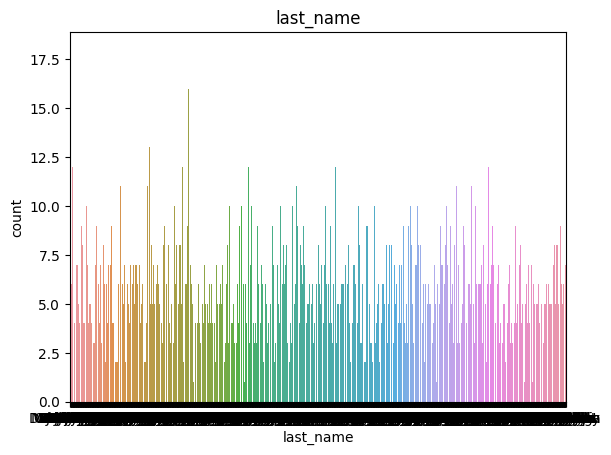

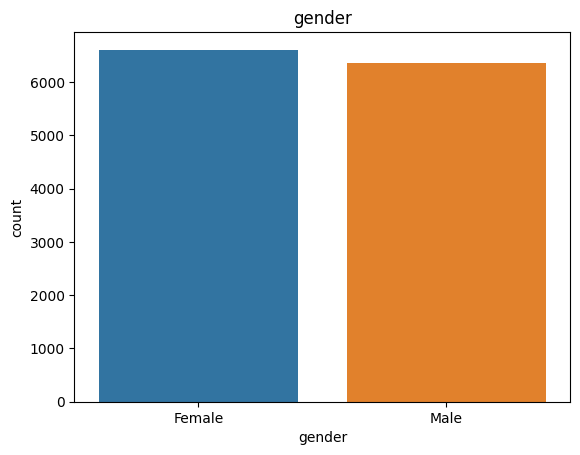

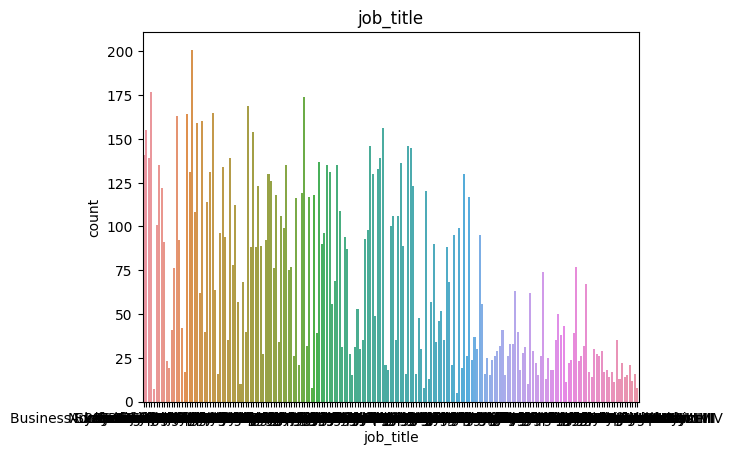

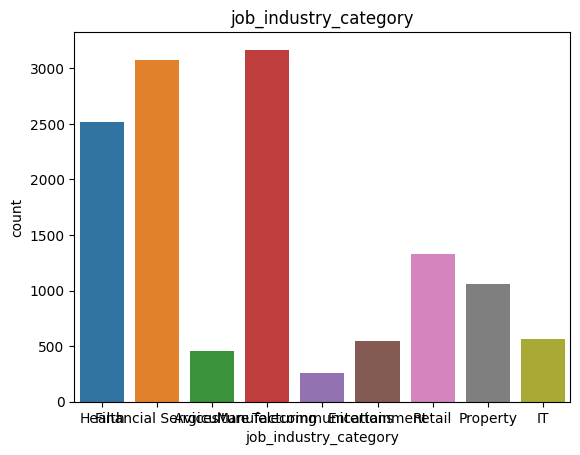

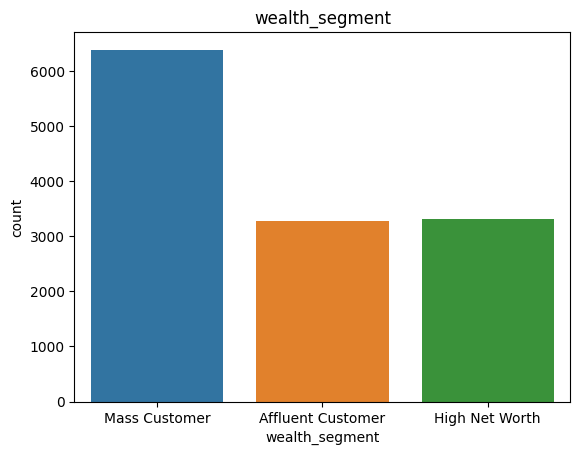

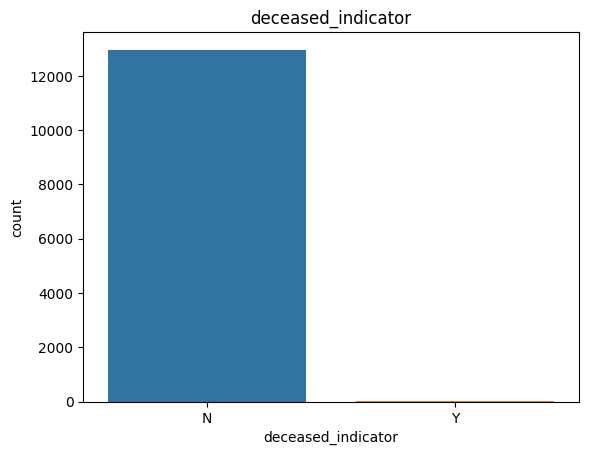

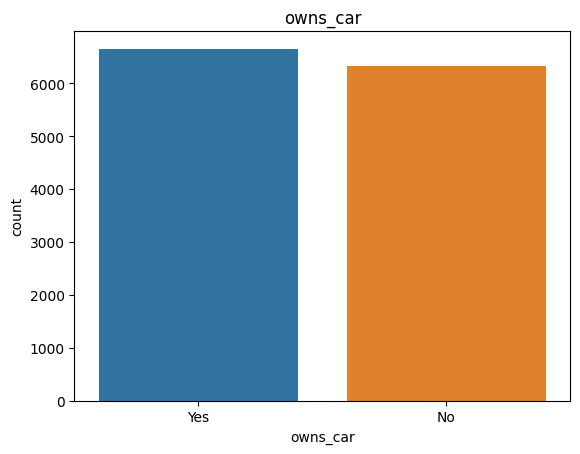

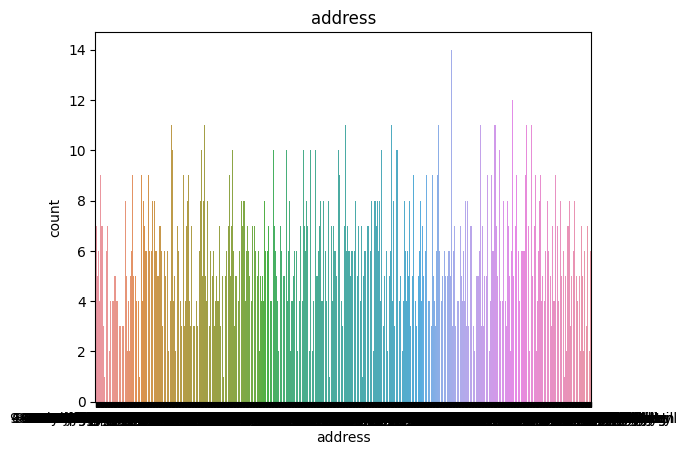

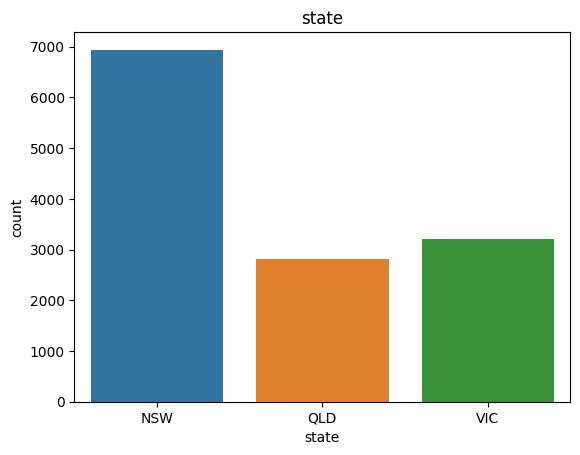

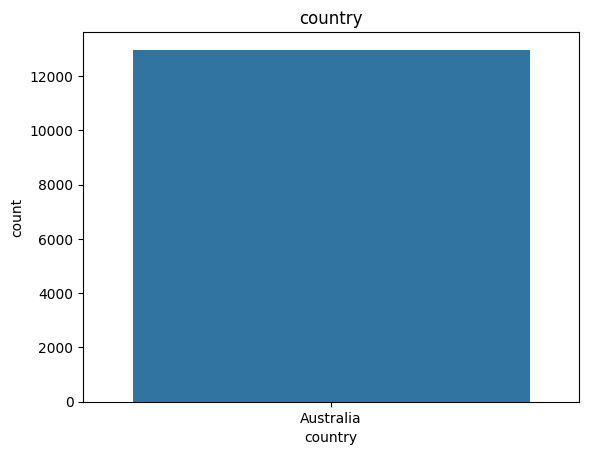

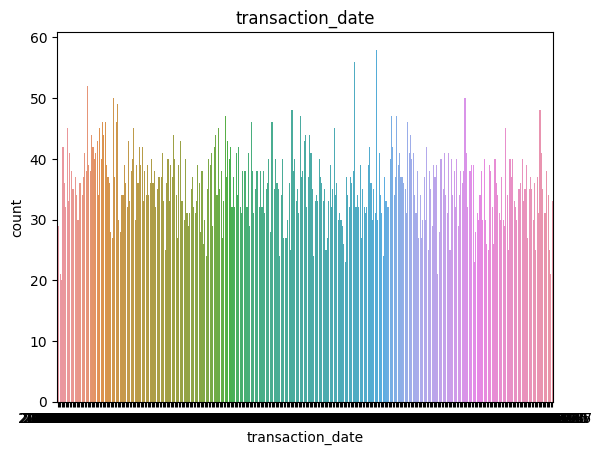

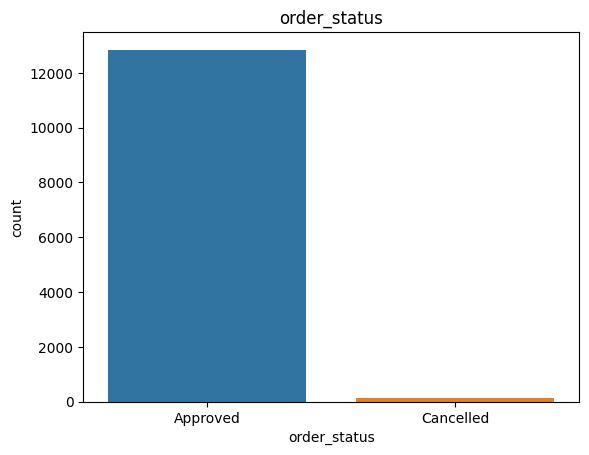

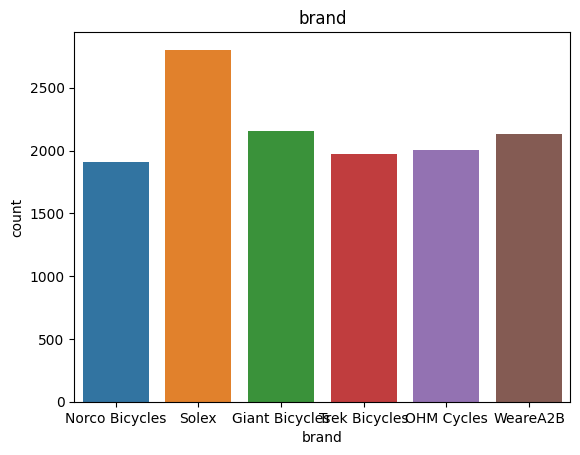

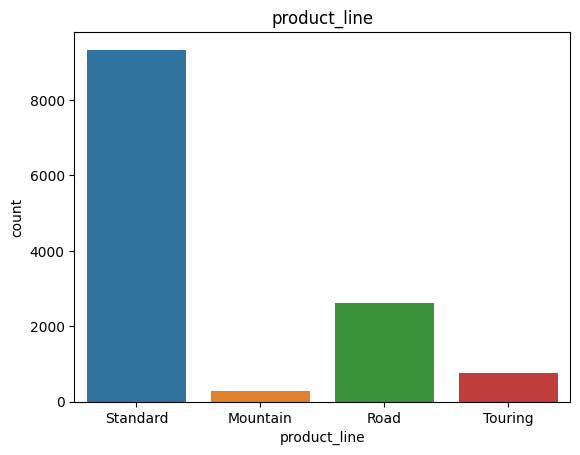

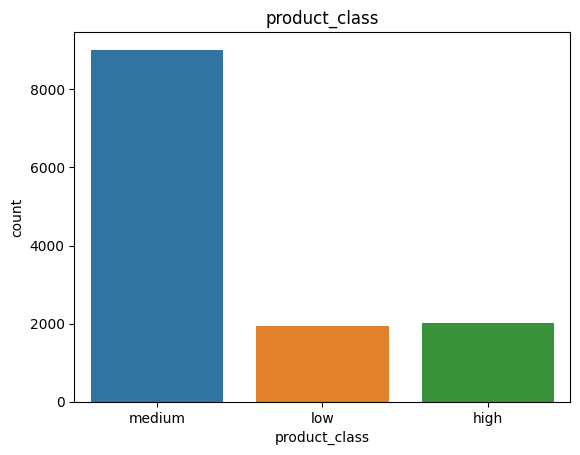

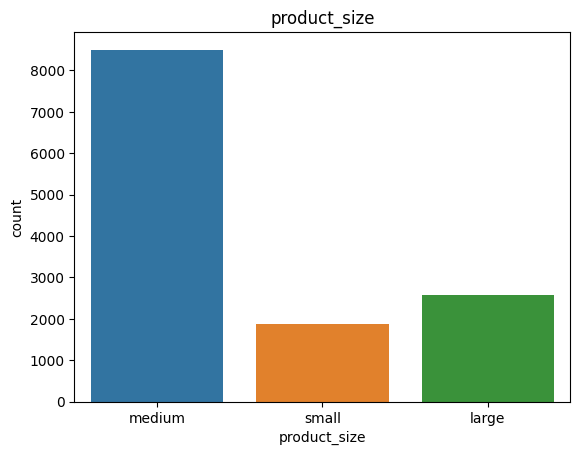

In [29]:
plt.figure(figsize=(6, 6))

for col in dis_col:
    sns.countplot(data = oldCustomerList, x = col)
    plt.title(col)
    plt.show()

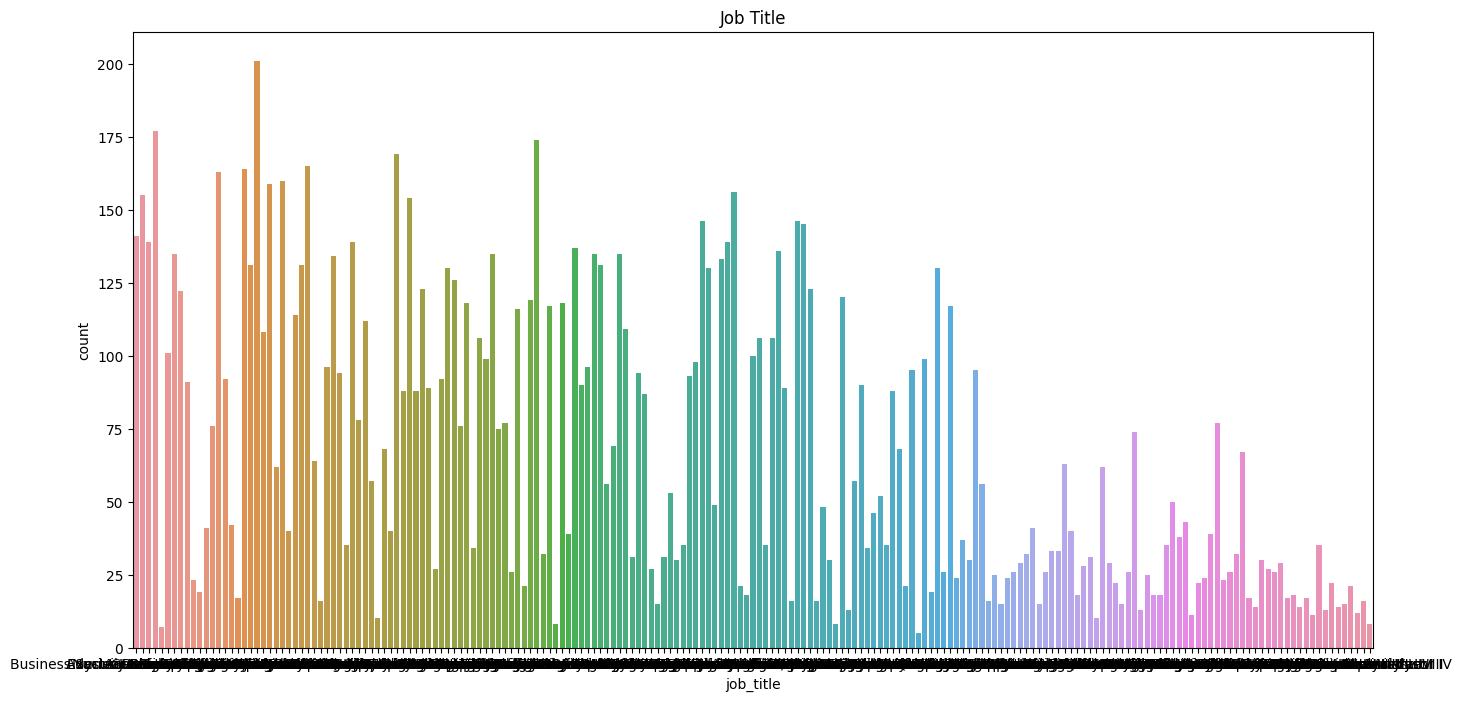

In [30]:
plt.figure(figsize = (16,8))
sns.countplot(x='job_title', data = oldCustomerList)
plt.title('Job Title')
#plt.savefig('job_industry.png')
plt.show()

In [31]:
oldCustomerList['job_title'].value_counts()

job_title
Social Worker                201
Nuclear Power Engineer       177
Chemical Engineer            174
Internal Auditor             169
Registered Nurse             165
                            ... 
Office Assistant II            8
Developer IV                   8
Research Assistant III         8
Developer I                    7
Database Administrator II      5
Name: count, Length: 195, dtype: int64

In [32]:
value_counts = oldCustomerList['job_title'].value_counts().reset_index()
value_counts.columns = ['Value', 'Count']
print(value_counts)

                         Value  Count
0                Social Worker    201
1       Nuclear Power Engineer    177
2            Chemical Engineer    174
3             Internal Auditor    169
4             Registered Nurse    165
..                         ...    ...
190        Office Assistant II      8
191               Developer IV      8
192     Research Assistant III      8
193                Developer I      7
194  Database Administrator II      5

[195 rows x 2 columns]


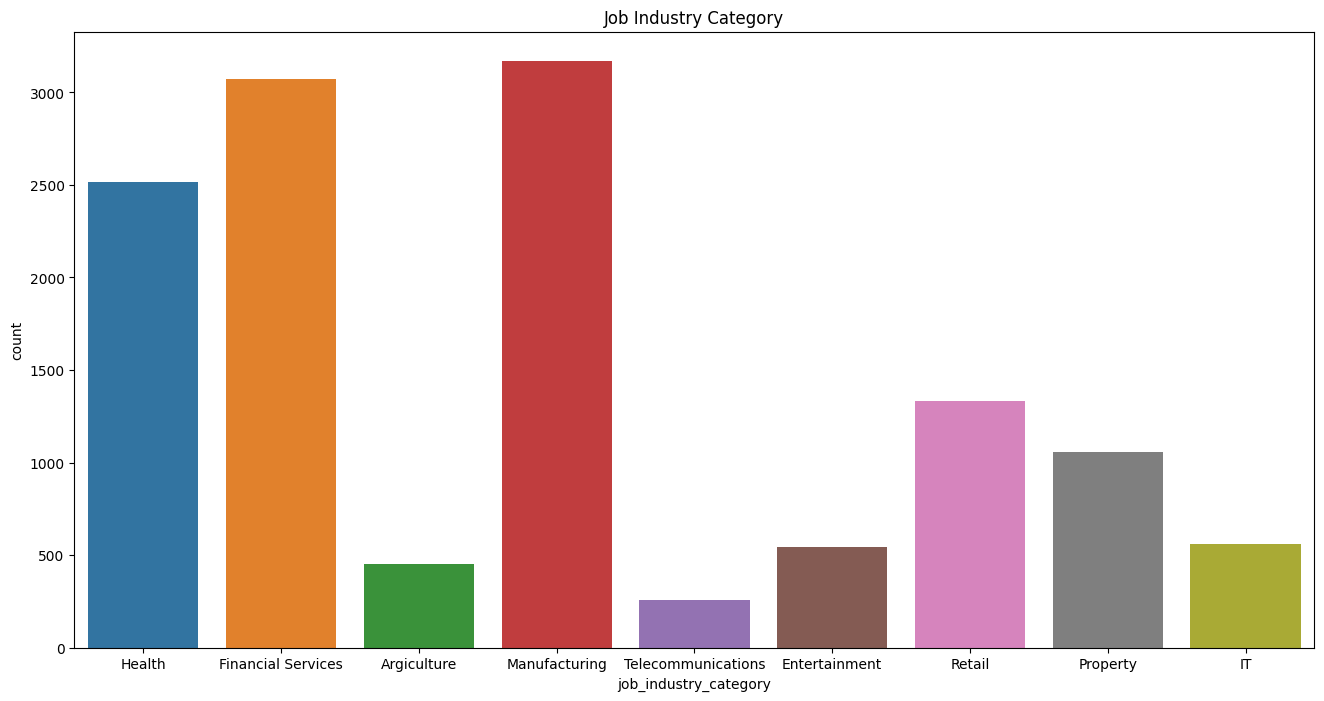

In [33]:
plt.figure(figsize = (16,8))
sns.countplot(x='job_industry_category', data = oldCustomerList)
plt.title('Job Industry Category')
#plt.savefig('job_industry.png')
plt.show()

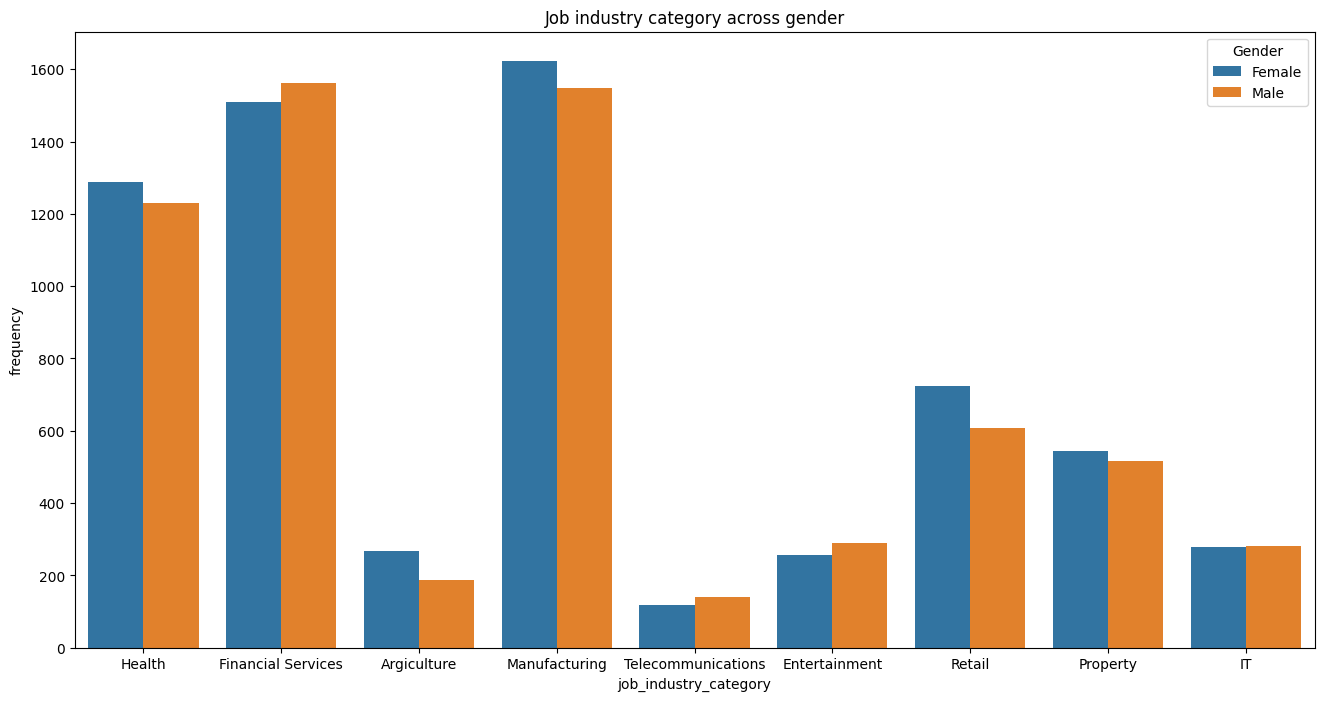

In [34]:
plt.figure(figsize = (16,8))
sns.countplot(x='job_industry_category', data=oldCustomerList, hue='gender')
plt.legend(title='Gender', loc='upper right', fancybox=True)
plt.title('Job industry category across gender')
plt.ylabel("frequency")
#plt.savefig('job_industry-gender_original.png')
plt.show()

Overall, we can see not much difference between male and female

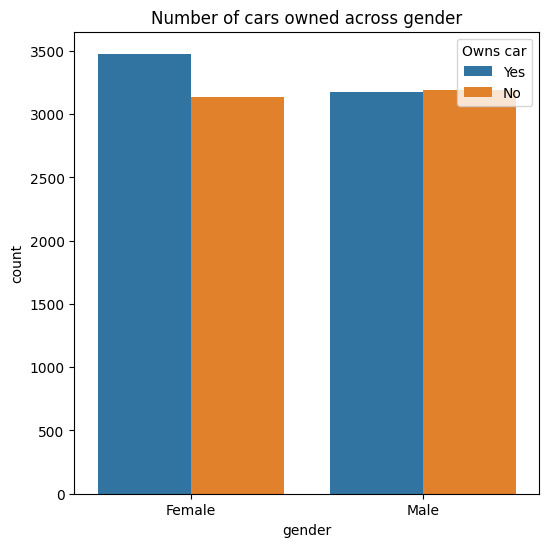

In [37]:
plt.figure(figsize = (6,6))
sns.countplot(x='gender', data=oldCustomerList, hue='owns_car')
plt.legend(title='Owns car', loc='upper right')
plt.title('Number of cars owned across gender')
plt.savefig('owns_car_original.png')
plt.show()

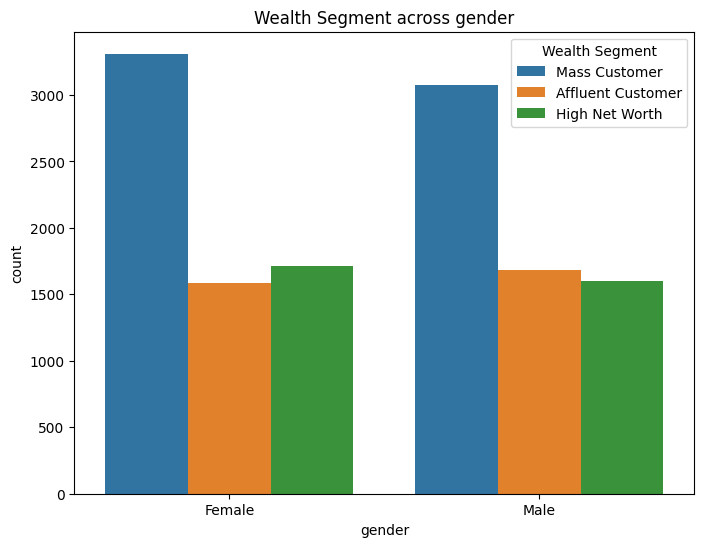

In [40]:
plt.figure(figsize = (8,6))
sns.countplot(x='gender', data=oldCustomerList, hue='wealth_segment')
plt.legend(title='Wealth Segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across gender')
#plt.savefig('wealth_segment-gender.png')
plt.show()

Some background on wealth segement.<br> Mass Customer: This segment typically includes individuals who have a moderate level of wealth or financial resources. They may have regular income and spending patterns, and they might make up a significant portion of the overall customer base.

Affluent Customer: The affluent segment represents individuals with higher-than-average wealth. These individuals may have more disposable income, investments, and assets. They are likely capable of making larger purchases and investments compared to mass customers.

High Net Worth (HNW) Customer: This segment includes individuals with substantial wealth and significant financial resources. High net worth customers often have diverse investment portfolios, substantial assets, and may be involved in more sophisticated financial activities.



<Figure size 600x600 with 0 Axes>

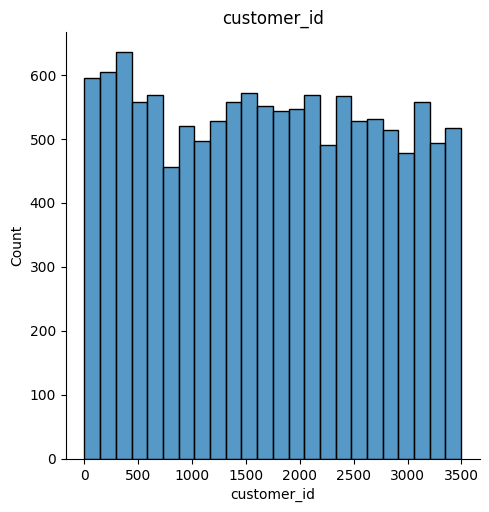

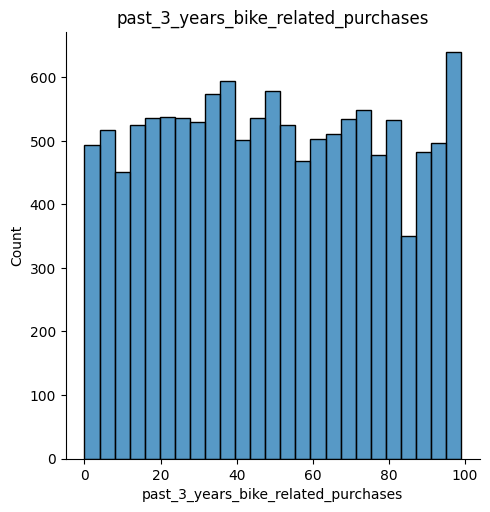

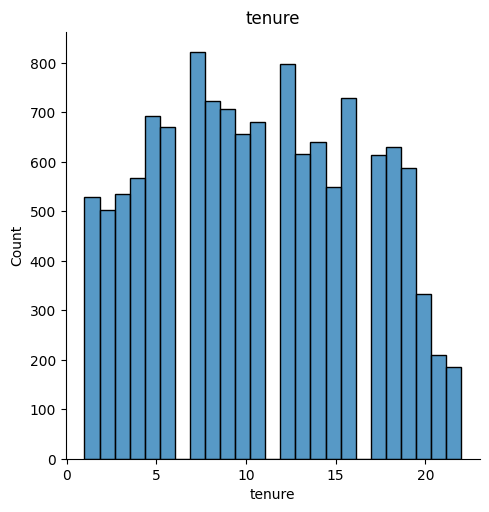

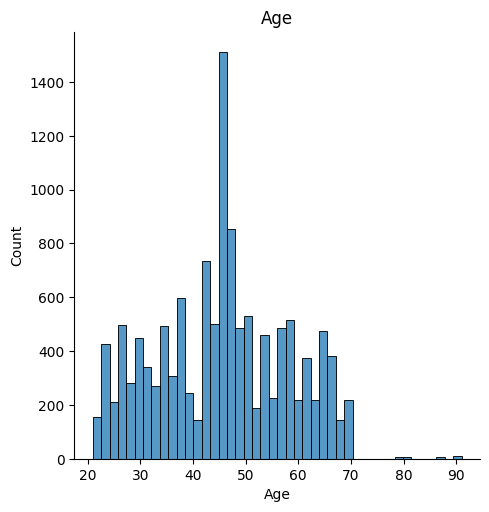

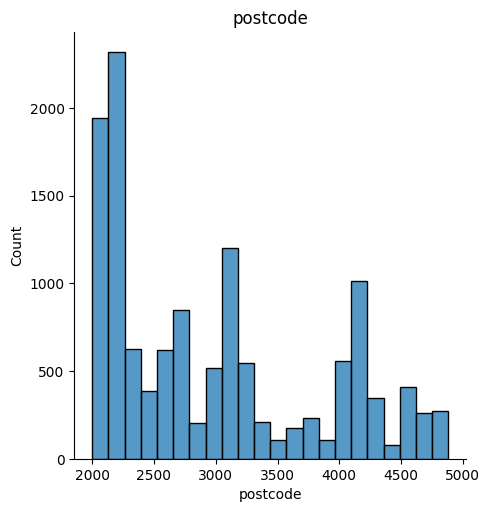

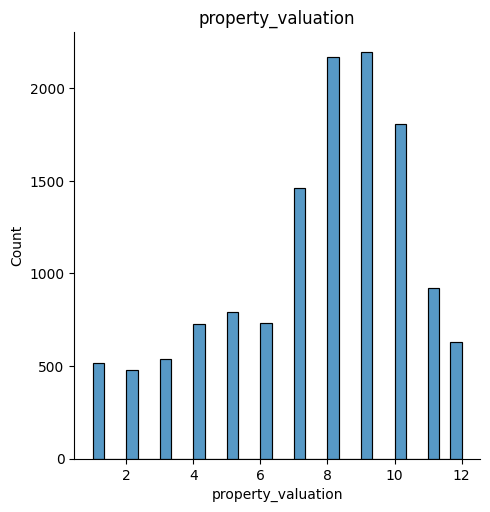

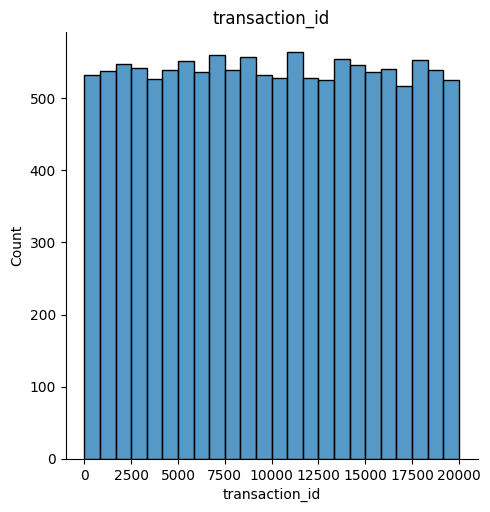

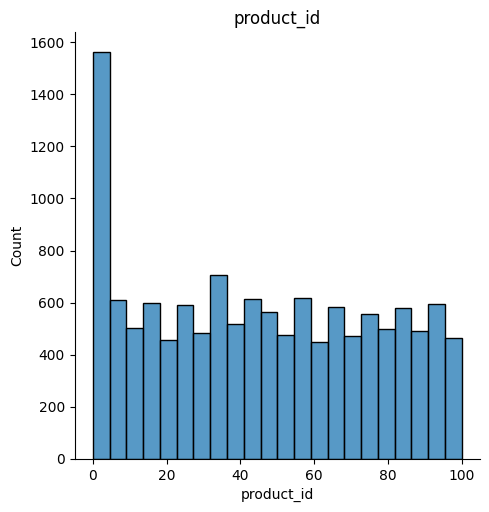

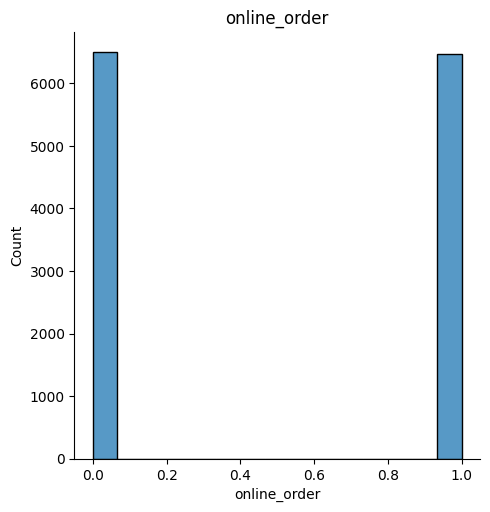

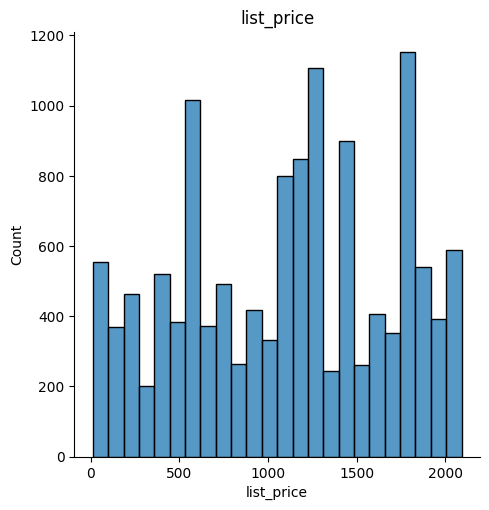

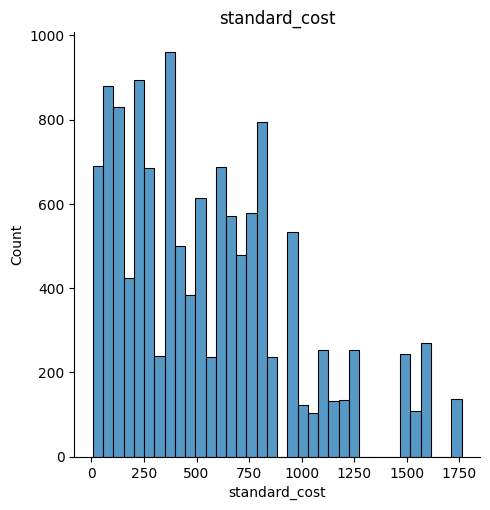

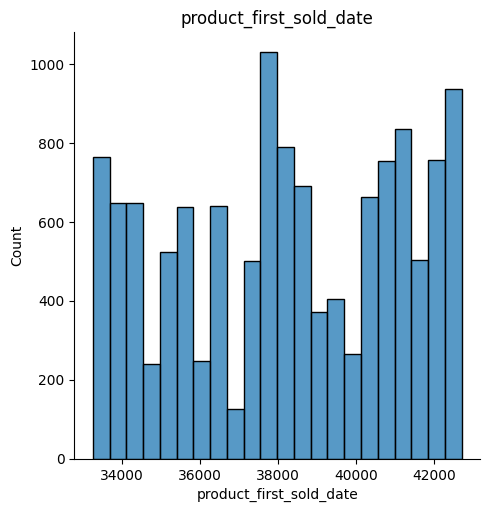

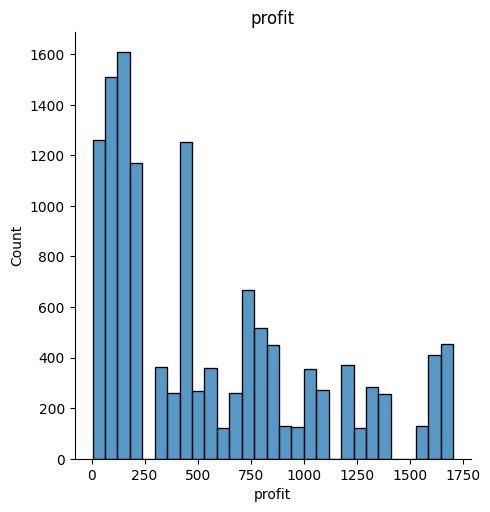

In [42]:
plt.figure(figsize = (6, 6))

for col in con_col:
    sns.displot(data = oldCustomerList, x = col)
    plt.title(col)
    plt.show()

<Figure size 800x800 with 0 Axes>

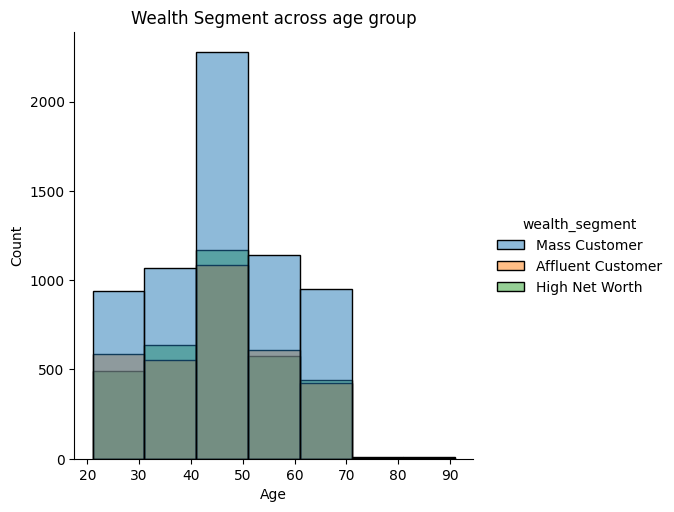

In [44]:
plt.figure(figsize = (8,8))
sns.displot(x='Age', binwidth=10, data=oldCustomerList, hue='wealth_segment')
plt.title('Wealth Segment across age group')
#plt.savefig('wealth_segment-age.png')
plt.show()

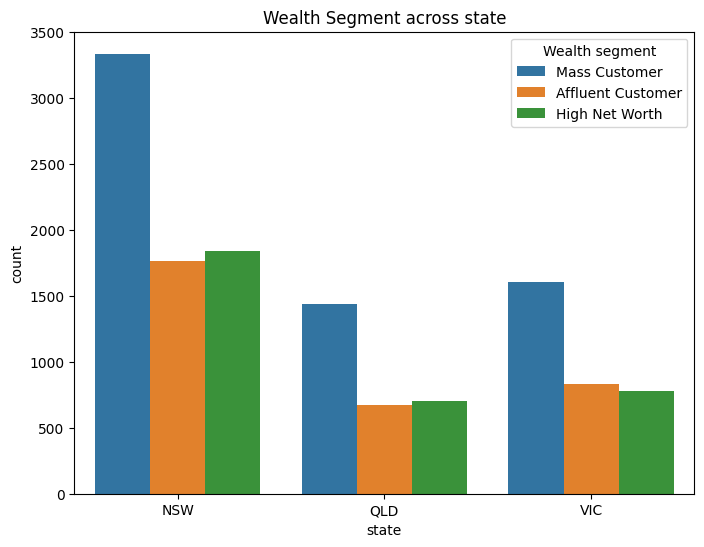

In [46]:
plt.figure(figsize = (8,6))
sns.countplot(x='state', data=oldCustomerList, hue='wealth_segment')
plt.legend(title='Wealth segment', loc='upper right')
plt.title('Wealth Segment across state')
#plt.savefig('wealth_segment-state.png')
plt.show()

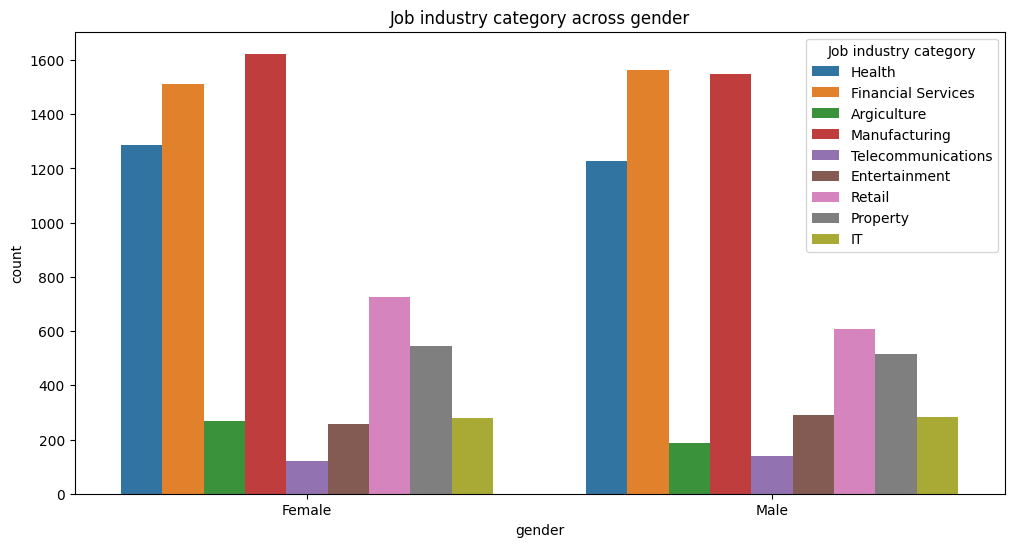

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(x='gender', data=oldCustomerList, hue='job_industry_category', order = oldCustomerList['gender'].value_counts().index)
plt.legend(title='Job industry category', loc='upper right')
plt.title('Job industry category across gender')
#plt.savefig('job_industry-gender_original.png')
plt.show()

For both male and female most of the customers are from manufacturing, financial services, and health

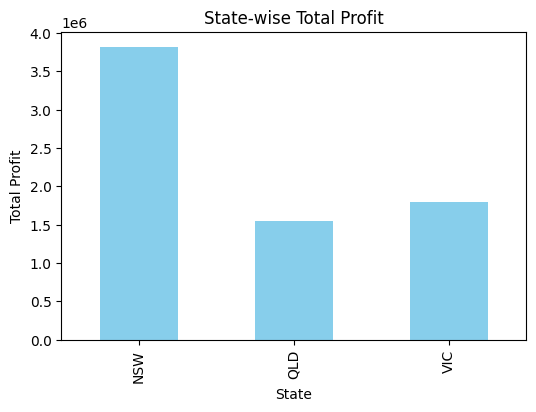

In [56]:
# Group data by state and calculate total profit
state_profit = oldCustomerList.groupby('state')['profit'].sum()

# Create a bar graph
plt.figure(figsize=(6, 4))
state_profit.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.title('State-wise Total Profit')

# Show the graph
plt.show()

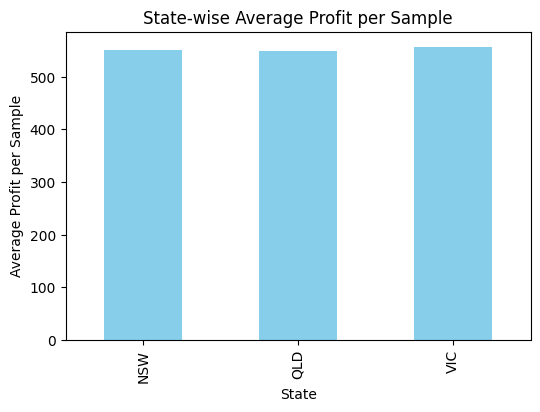

In [57]:
# Group data by state and calculate total profit and count
state_data = oldCustomerList.groupby('state')['profit'].agg(['sum', 'count'])

# Calculate average profit per sample
state_data['average_profit'] = state_data['sum'] / state_data['count']

# Create a bar graph
plt.figure(figsize=(6, 4))
state_data['average_profit'].plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Average Profit per Sample')
plt.title('State-wise Average Profit per Sample')

# Show the graph
plt.show()

NSW has more sells and therefore, more profit. But if we see the average profit it is almost similar for all states.

## New Customer List

In [77]:
newCustomerList = pd.read_csv("NewCustomer_cleaned.csv")

In [78]:
newCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [79]:
newCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           715 non-null    object 
 1   last_name                            715 non-null    object 
 2   gender                               715 non-null    object 
 3   past_3_years_bike_related_purchases  715 non-null    int64  
 4   DOB                                  715 non-null    object 
 5   job_title                            715 non-null    object 
 6   job_industry_category                715 non-null    object 
 7   wealth_segment                       715 non-null    object 
 8   deceased_indicator                   715 non-null    object 
 9   owns_car                             715 non-null    object 
 10  tenure                               715 non-null    int64  
 11  address                         

In [80]:
newCustomerList.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

In [81]:
newCustomerList['DOB'] = pd.to_datetime(newCustomerList['DOB'], errors='coerce')

In [82]:
newCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           715 non-null    object        
 1   last_name                            715 non-null    object        
 2   gender                               715 non-null    object        
 3   past_3_years_bike_related_purchases  715 non-null    int64         
 4   DOB                                  676 non-null    datetime64[ns]
 5   job_title                            715 non-null    object        
 6   job_industry_category                715 non-null    object        
 7   wealth_segment                       715 non-null    object        
 8   deceased_indicator                   715 non-null    object        
 9   owns_car                             715 non-null    object        
 10  tenure        

In [84]:
newCustomerList['DOB'] = newCustomerList['DOB'].apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')

In [86]:
newCustomerList['DOB'].astype('datetime64[ns]')

0     1957-07-12
1     1970-03-22
2            NaT
3     1979-01-28
4     1965-09-21
         ...    
710   1959-10-07
711   2001-10-17
712   1954-10-05
713   1952-12-17
714   1955-10-02
Name: DOB, Length: 715, dtype: datetime64[ns]

In [87]:
newCustomerList.isna().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

In [88]:
ref_date2 = dt.datetime.now()
newCustomerList['Age'] = newCustomerList['DOB'].apply(lambda x: len(pd.date_range(start = x, end = ref_date2, freq = 'Y')) if str(x) else None)

In [89]:
newCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,66.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,53.0
2,Ardelis,Forrester,Female,10,,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,NaN
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,44.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,58.0


In [91]:
newCustomerList['Age'].describe()

count    676.000000
mean      51.928994
std       17.491780
min       21.000000
25%       37.000000
50%       52.000000
75%       66.250000
max       85.000000
Name: Age, dtype: float64

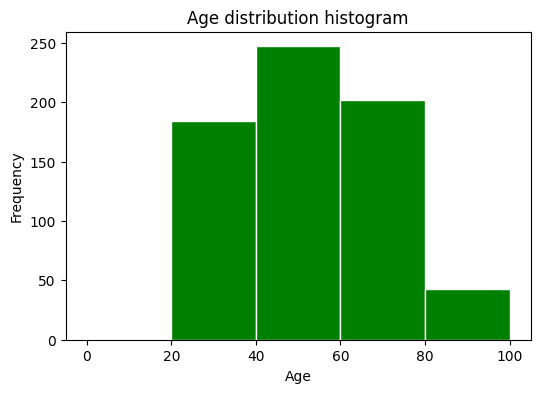

In [95]:
#Data visualisation
plt.figure(figsize = (6,4))
plt.hist(newCustomerList['Age'], color = 'green', edgecolor = 'white', bins=[0,20,40,60,80,100])
plt.title('Age distribution histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_dist_histogram2.png')
plt.show()

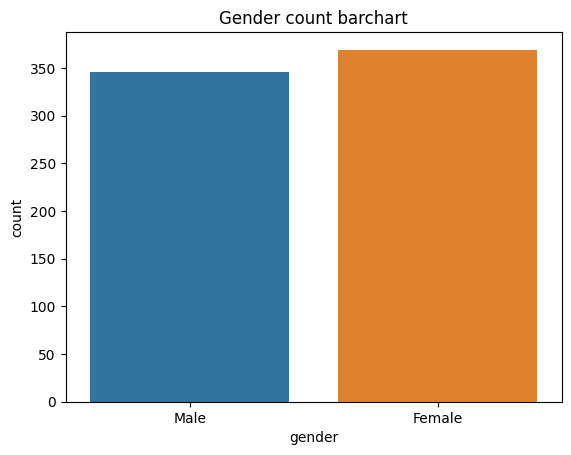

In [96]:
sns.countplot(x = 'gender', data = newCustomerList)
plt.title('Gender count barchart')
plt.savefig('gender_count_new.png')
plt.show()

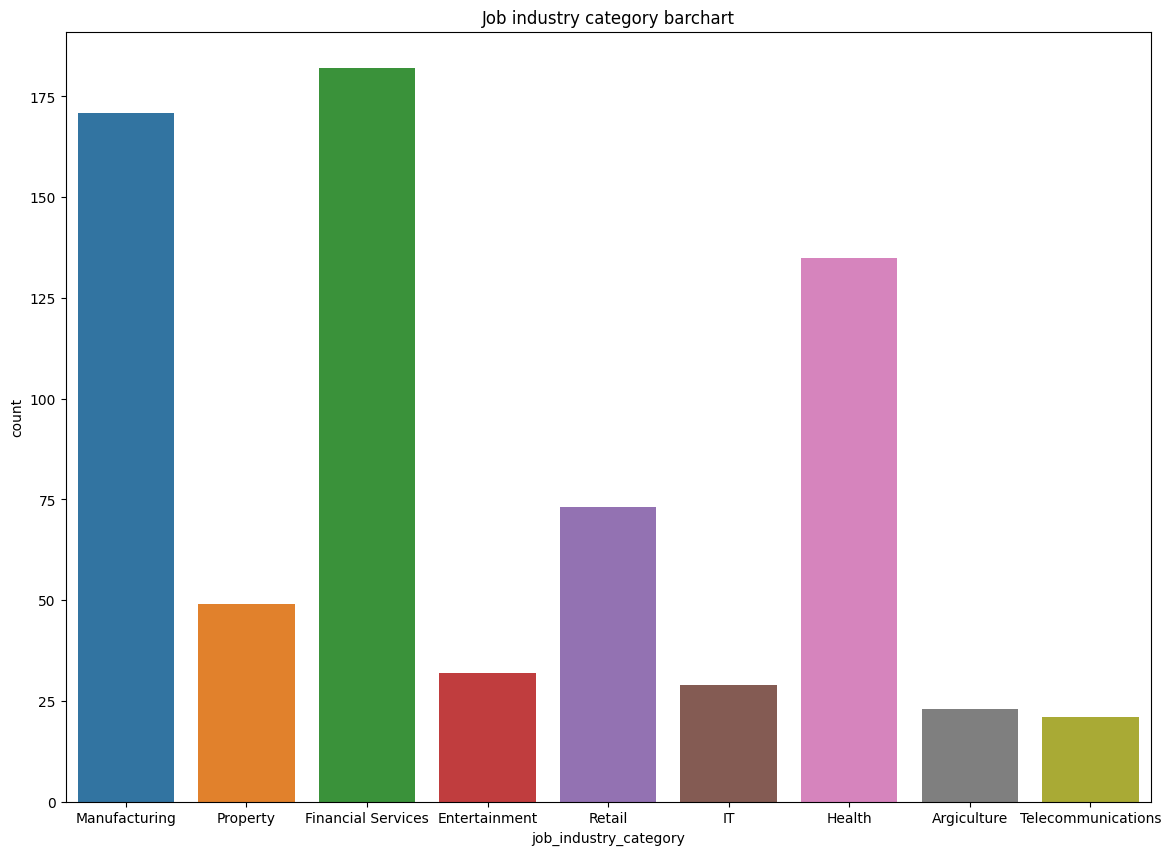

In [101]:
plt.figure(figsize = (14,10))
sns.countplot(x='job_industry_category', data = newCustomerList)
plt.title('Job industry category barchart')
plt.savefig('job_industry_new.png')
plt.show()

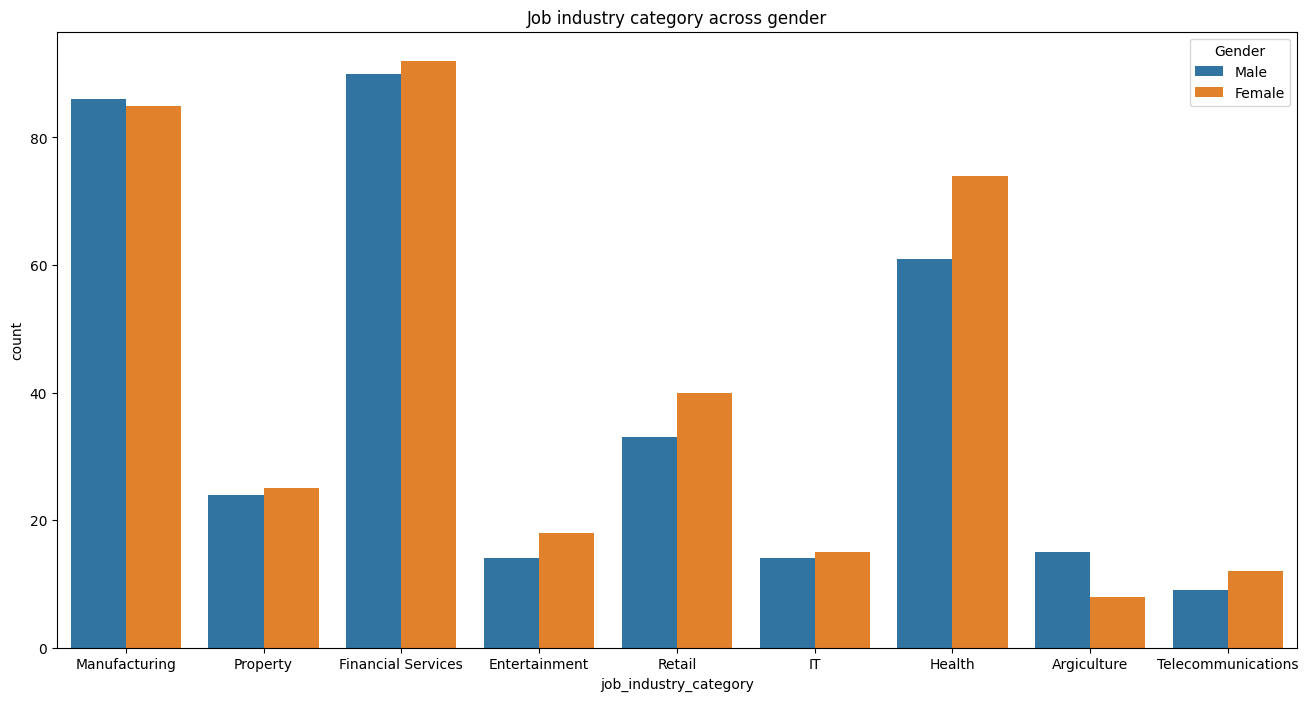

In [102]:
plt.figure(figsize = (16,8))
sns.countplot(x='job_industry_category', data=newCustomerList, hue='gender')
plt.legend(title='Gender', loc='upper right')
plt.title('Job industry category across gender')
plt.savefig('job_industry-gender_new.png')
plt.show()

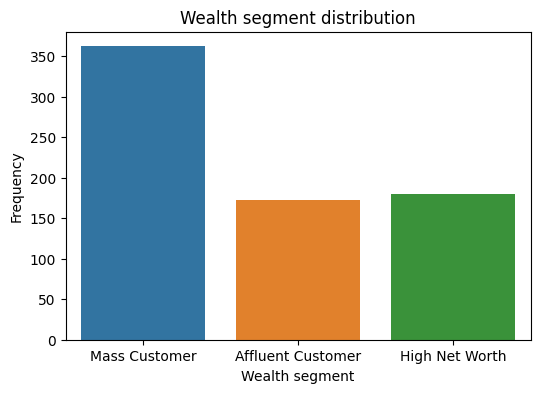

In [104]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'wealth_segment', data = newCustomerList)
plt.title('Wealth segment distribution')
plt.xlabel('Wealth segment')
plt.ylabel('Frequency')
plt.savefig('wealth_segment_new.png')
plt.show()

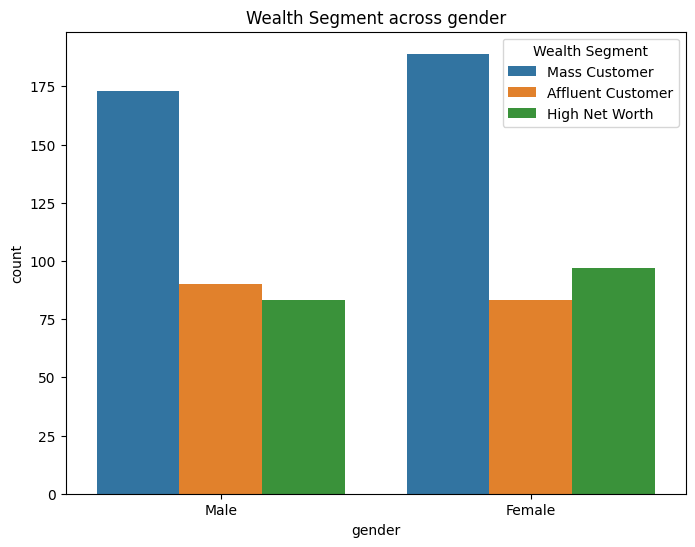

In [106]:
plt.figure(figsize = (8,6))
sns.countplot(x='gender', data=newCustomerList, hue='wealth_segment')
plt.legend(title='Wealth Segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across gender')
#plt.savefig('wealth_segment-gender_new.png')
plt.show()

<Figure size 600x400 with 0 Axes>

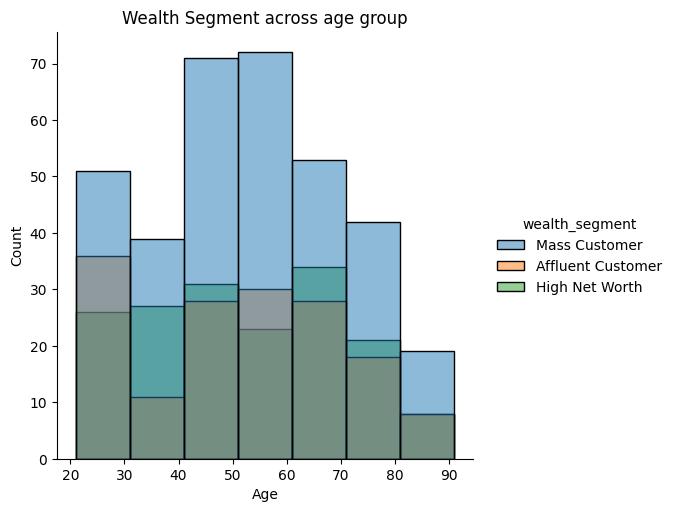

In [107]:
plt.figure(figsize = (6,4))
sns.displot(x='Age', binwidth=10, data=newCustomerList, hue='wealth_segment')
plt.title('Wealth Segment across age group')
plt.savefig('wealth_segment-age_new.png')
plt.show()

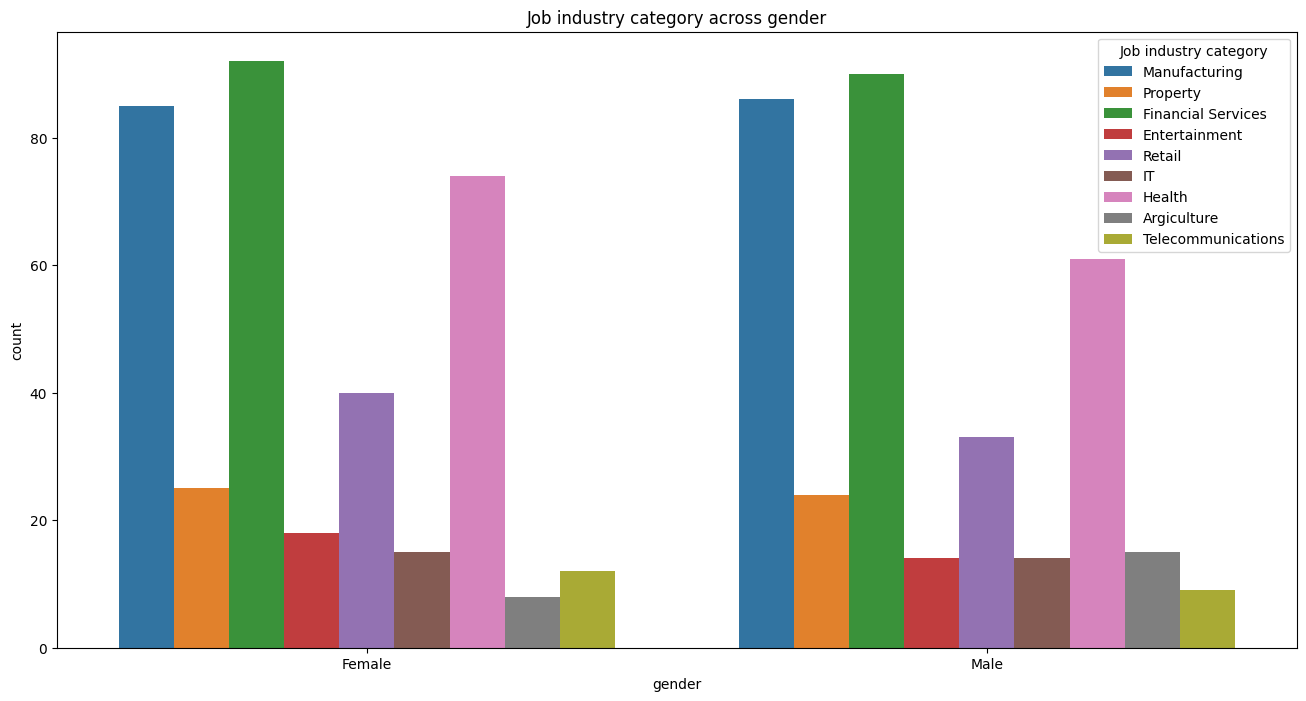

In [108]:
plt.figure(figsize=(16,8))
sns.countplot(x='gender', data=newCustomerList, hue='job_industry_category', order = newCustomerList['gender'].value_counts().index)
plt.legend(title='Job industry category', loc='upper right', fancybox=True)
plt.title('Job industry category across gender')
#plt.savefig('job_industry-gender_new.png')
plt.show()